# Delnice

Projekt pri Programiranju 1 z namenom analize gibanja delnic desetih večjih slovenskih podjetij.

## Priprava
Shranimo zgodovino vrednosti vsake delnice za obdobje enega leta (iz strani http://www.ljse.si/cgi-bin/jve.cgi?doc=1289), nato zberemo podatke za obdelavo v csv datoteke za vsako podjetje posebej. Te datoteke naložimo v jupyter in začnemo z analizo.

In [91]:
import pandas as pd

cinkarna_celje = pd.read_csv('csv-datoteke/CICG.csv', index_col = 'datum')
gorenje = pd.read_csv('csv-datoteke/GRVG.csv', index_col = 'datum')
intereuropa = pd.read_csv('csv-datoteke/IEKG.csv', index_col = 'datum')
kd_group = pd.read_csv('csv-datoteke/KDHR.csv', index_col = 'datum')
krka = pd.read_csv('csv-datoteke/KRKG.csv', index_col = 'datum')
luka_koper = pd.read_csv('csv-datoteke/LKPG.csv', index_col = 'datum')
petrol = pd.read_csv('csv-datoteke/PETG.csv', index_col = 'datum')
pozavarovalnica_sava = pd.read_csv('csv-datoteke/POSR.csv', index_col = 'datum')
telekom_slovenije = pd.read_csv('csv-datoteke/TLSG.csv', index_col = 'datum')
zavarovalnica_triglav = pd.read_csv('csv-datoteke/ZVTG.csv', index_col = 'datum')

pd.options.display.max_rows = 10

In [11]:
%matplotlib inline

## Analiza

In [12]:
zavarovalnica_triglav

,najvisji_tecaj,odpiralni_tecaj,najnizji_tecaj,uradni_tecaj
datum,,,,
31.07.2015,25.10,24.610,24.610,25.10
03.08.2015,25.10,24.610,24.610,25.01
04.08.2015,25.50,25.500,25.120,25.30
05.08.2015,25.74,25.110,25.110,25.50
06.08.2015,25.50,25.100,25.100,25.50
...,...,...,...,...
25.07.2016,23.79,23.255,23.255,23.65
26.07.2016,23.70,23.660,23.600,23.61
27.07.2016,23.70,23.600,23.600,23.70


Spodnji graf prikazuje gibanje delnic Zavarovalnice Triglav. Vidimo lahko, da se najnižji, najvišji in uradni tečaj gibljejo približno enako.

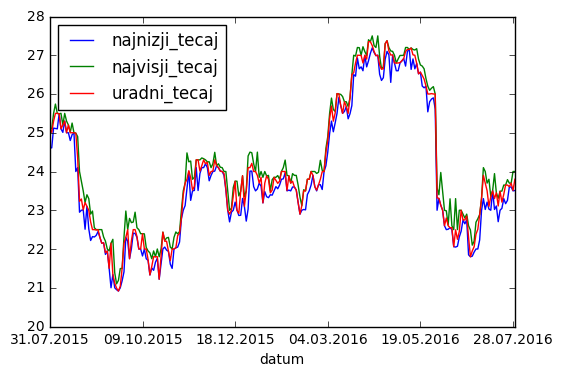

In [13]:
zavarovalnica_triglav[['najnizji_tecaj','najvisji_tecaj','uradni_tecaj']].plot()

### Primerjava gibanja delnic vseh desetih podjetij naenkrat

Spodaj je narejena tabela, v kateri so zbrani uradni tečaji vseh desetih podjetij.
Pod tem je še graf, ki kaže gibanje delnic za vsa podjetja hkrati v obdobju enega leta.

Iz grafa lahko razberemo, da ima največjo vrednost delnic Petrol, najmanjšo pa Intereuropa.


In [29]:
cink = cinkarna_celje[['uradni_tecaj']].rename(columns={'uradni_tecaj':'cink'})
gor = gorenje[['uradni_tecaj']].rename(columns={'uradni_tecaj':'gor'})
inte = intereuropa[['uradni_tecaj']].rename(columns={'uradni_tecaj':'inte'})
kd = kd_group[['uradni_tecaj']].rename(columns={'uradni_tecaj':'kd'})
kr= krka[['uradni_tecaj']].rename(columns={'uradni_tecaj':'kr'})
luka = luka_koper[['uradni_tecaj']].rename(columns={'uradni_tecaj':'luka'})
pe = petrol[['uradni_tecaj']].rename(columns={'uradni_tecaj':'pe'})
sava = pozavarovalnica_sava[['uradni_tecaj']].rename(columns={'uradni_tecaj':'sava'})
tel = telekom_slovenije[['uradni_tecaj']].rename(columns={'uradni_tecaj':'tel'})
trig = zavarovalnica_triglav[['uradni_tecaj']].rename(columns={'uradni_tecaj':'trig'})


In [30]:
skupno = pd.concat([cink, gor, inte, kd, kr, luka, pe, sava, tel, trig], axis=1, join='inner')
skupno

,cink,gor,inte,kd,kr,luka,pe,sava,tel,trig
datum,,,,,,,,,,
31.07.2015,140.00,6.200,1.000,8.90,65.75,26.000,256.0,14.10,94.00,25.10
03.08.2015,137.70,6.200,0.852,8.90,64.62,25.990,252.0,14.10,94.00,25.01
04.08.2015,134.90,6.101,0.852,8.90,64.03,25.500,252.0,14.00,94.00,25.30
05.08.2015,130.10,6.001,0.852,9.00,64.01,26.000,253.0,14.08,87.99,25.50
06.08.2015,130.00,6.000,0.990,9.00,64.09,26.100,252.4,13.90,84.96,25.50
...,...,...,...,...,...,...,...,...,...,...
25.07.2016,87.88,6.581,0.710,7.04,58.00,22.510,282.0,14.50,73.00,23.65
26.07.2016,87.00,7.031,0.821,7.00,57.50,22.350,279.2,14.50,73.00,23.61
27.07.2016,85.10,7.450,0.810,7.00,58.95,22.490,278.1,14.30,72.71,23.70


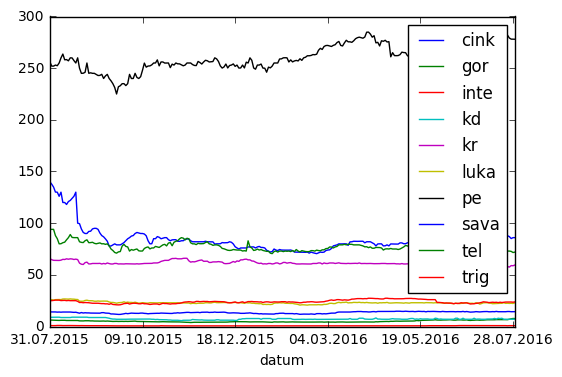

In [31]:
skupno[['cink', 'gor', 'inte', 'kd', 'kr', 'luka', 'pe', 'sava', 'tel', 'trig']].plot()

Na spodnjem grafu so skupaj zbrani podatki le za podjetja KD Group, Pozavarovalnica Sava in Zavarovalnica Triglav, ki so vsa v isti veji gospodarstva. Ena izmed hipotez je bila, da se delnice podjetij iz iste veje gibljejo približno enako - na grafu vidimo, da se delnice KD Groupa in Pozavarovalnice Save gibljejo približno enako, malo več odstopanja pa je pri gibanju delnic Zavarovalnice Triglav.

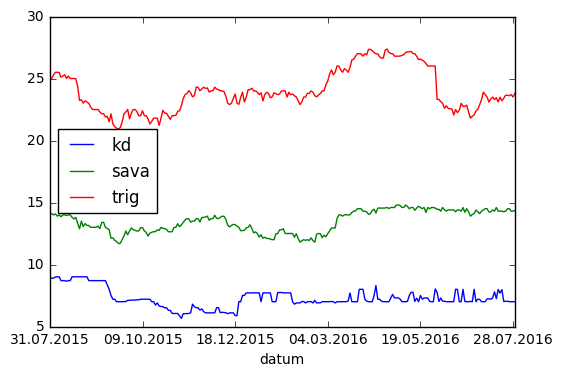

In [32]:
skupno[['kd', 'sava','trig']].plot()

Še en graf, ki prikazuje gibanje delnic podjetij iz iste veje gospodarstva. Tukaj je to transport. Spremembe v rasti in padcu delnic obeh podjetij se razlikujejo - delnice Intereurope imajo dokaj konstantno vrednost, medtem ko vrednost delnic Luke Koper opazno niha.

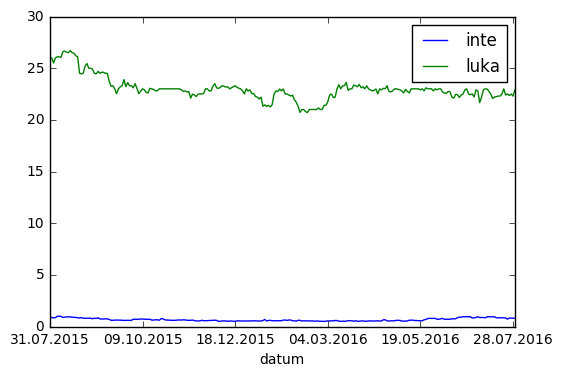

In [33]:
skupno[['inte', 'luka']].plot()

### Povprečne vrednosti delnic

V tem delu smo izračunali povprečne vrednosti delnic za posamezno podjetje, in jih po velikosti prikazali tudi na grafu. Vidimo, da ima Intereuropa najmanjšo povprečno vrednost delnic skozi leto, Petrol pa največjo.

In [36]:
povprecja = skupno.mean()
povprecja

cink     83.637500
gor       5.063504
inte      0.659806
kd        7.264829
kr       61.142381
luka     23.005675
pe      259.459127
sava     13.486012
tel      76.166508
trig     23.996687
dtype: float64

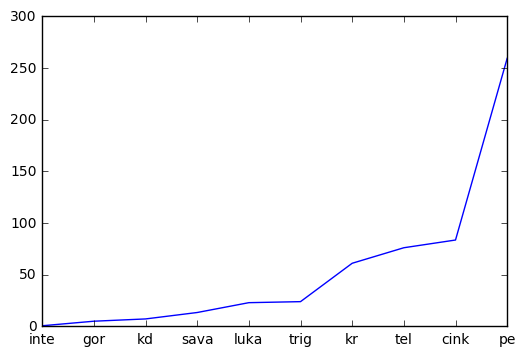

In [41]:
povprecja.sort_values().plot()

V zadnjem delu analize smo za vsako podjetje določili najmanjšo vrednost uradnega tečaja delnice v celem letu, prav tako tudi največjo vrednost uradnega tečaja delnice v celem letu. Ti dve vrednosti smo primerjali s povprečjem in dobili odstopanje največje vrednosti od povprečja ter najmanjše vrednosti od povprečja. Zanimalo nas je tudi, katera od zadnjih dveh vrednosti je večja - to je potem največje odstopanje. Največje odstopanje od povprečja smo izrazili še v odstotkih. Vse pridobljene in izračunane vrednosti smo prikazali v tabeli, na koncu pa smo izrisali še graf, ki prikazuje največja odstopanja vrednosti delnic od povprečja za vseh deset podjetij, in to po vrsti.
Vidimo lahko, da se je vrednost delnic najmanj spreminjala Krki, najbolj pa Cinkarni Celje.

In [63]:
max_cink = cinkarna_celje.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['cink']
min_cink = abs(cinkarna_celje.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['cink'])
max_gor = gorenje.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['gor']
min_gor = abs(gorenje.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['gor'])
max_inte = intereuropa.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['inte']
min_inte = abs(intereuropa.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['inte'])
max_kd = kd_group.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['kd']
min_kd = abs(kd_group.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['kd'])
max_sava = pozavarovalnica_sava.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['sava']
min_sava = abs(pozavarovalnica_sava.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['sava'])
max_luka = luka_koper.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['luka']
min_luka = abs(luka_koper.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['luka'])
max_trig = zavarovalnica_triglav.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['trig']
min_trig = abs(zavarovalnica_triglav.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['trig'])
max_kr = krka.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['kr']
min_kr = abs(krka.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['kr'])
max_tel = telekom_slovenije.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['tel']
min_tel = abs(telekom_slovenije.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['tel'])
max_pe = petrol.sort_values('uradni_tecaj', ascending=False).iloc[0]['uradni_tecaj'] - povprecja['pe']
min_pe = abs(petrol.sort_values('uradni_tecaj').iloc[0]['uradni_tecaj'] - povprecja['pe'])

In [90]:
razlike = {'max': [max_cink, max_gor, max_inte, max_kd, max_kr, max_luka, max_pe, max_sava, max_tel, max_trig], 
           'min': [min_cink, min_gor, min_inte, min_kd, min_kr, min_luka, min_pe, min_sava, min_tel, min_trig]}
razpredelnica = pd.DataFrame(razlike, index=['cink', 'gor', 'inte', 'kd', 'kr', 'luka', 'pe', 'sava', 'tel', 'trig'])

razpredelnica['največje odstopanje'] = razpredelnica[['max','min']].max(axis=1)
razpredelnica['povprečje'] = povprecja
razpredelnica['odstotki'] = razpredelnica['največje odstopanje'] / razpredelnica ['povprečje'] * 100
razpredelnica = razpredelnica.sort_values('odstotki')
razpredelnica

,max,min,največje odstopanje,povprečje,odstotki
kr,4.907619,5.142381,5.142381,61.142381,8.410502
pe,25.440873,34.459127,34.459127,259.459127,13.281139
sava,1.308988,1.796012,1.796012,13.486012,13.317591
trig,3.378313,3.081687,3.378313,23.996687,14.078250
luka,3.694325,2.305675,3.694325,23.005675,16.058322
tel,17.833492,8.356508,17.833492,76.166508,23.413824
kd,1.745171,1.614829,1.745171,7.264829,24.022183
inte,0.340194,0.159806,0.340194,0.659806,51.559803
gor,2.686496,1.212504,2.686496,5.063504,53.056066
cink,56.362500,13.137500,56.362500,83.637500,67.389030


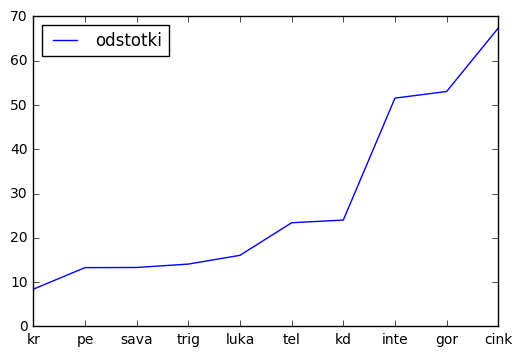

In [87]:
razpredelnica[['odstotki']].plot()